# Titanic Dataset
Author - Niyanta

In [81]:
# imports
import pandas as pd
import os
import numpy as np
import sklearn.metrics as metric
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [84]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# a.1 Load the “titanic.csv” data into a data frame
df = pd.read_csv("titanic.csv")

## EDA

In [85]:
# b.1 Display the first 3 records.
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [86]:
# b.2 Display (print) the shape of the dataframe.
print(df.shape)

(891, 12)


In [87]:
# b.3 Display (print) the names, types and counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [88]:
# b.4 columns with unique values, columns with a lot of missing values
print(df.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [89]:
# b.5 Display (print the unique values for the following columns : (“Sex”, “Pclass”)
print(df['Sex'].unique())
print(df['Pclass'].unique())

['male' 'female']
[3 1 2]


## Data visualization

Text(0.5, 0, 'Passenger classes')

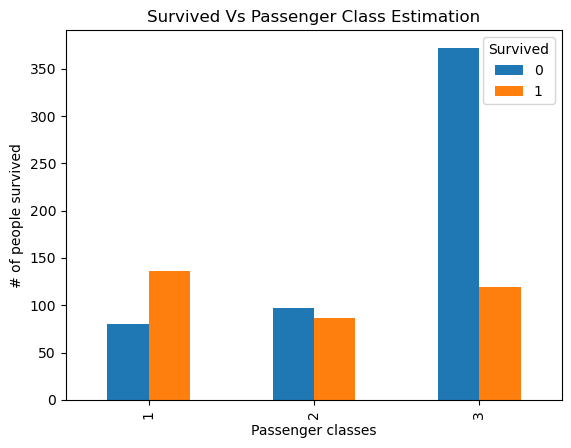

In [90]:

# c.1.a Data visualization
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')
plt.title('Survived Vs Passenger Class Estimation')
plt.ylabel('# of people survived')
plt.xlabel('Passenger classes')


Text(0.5, 0, 'Gender')

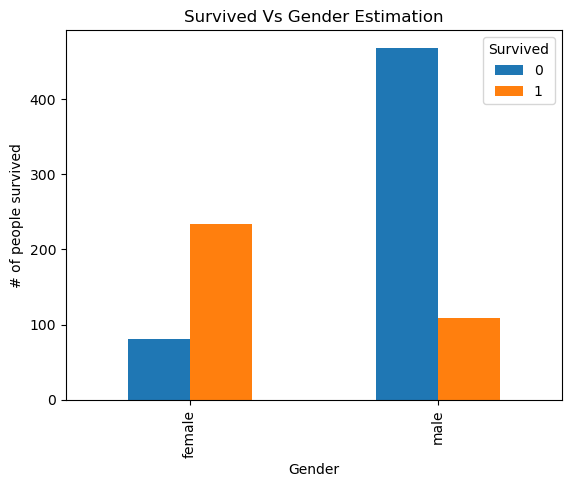

In [91]:
# c.1.b Data visualization
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Survived Vs Gender Estimation')
plt.ylabel('# of people survived')
plt.xlabel('Gender')

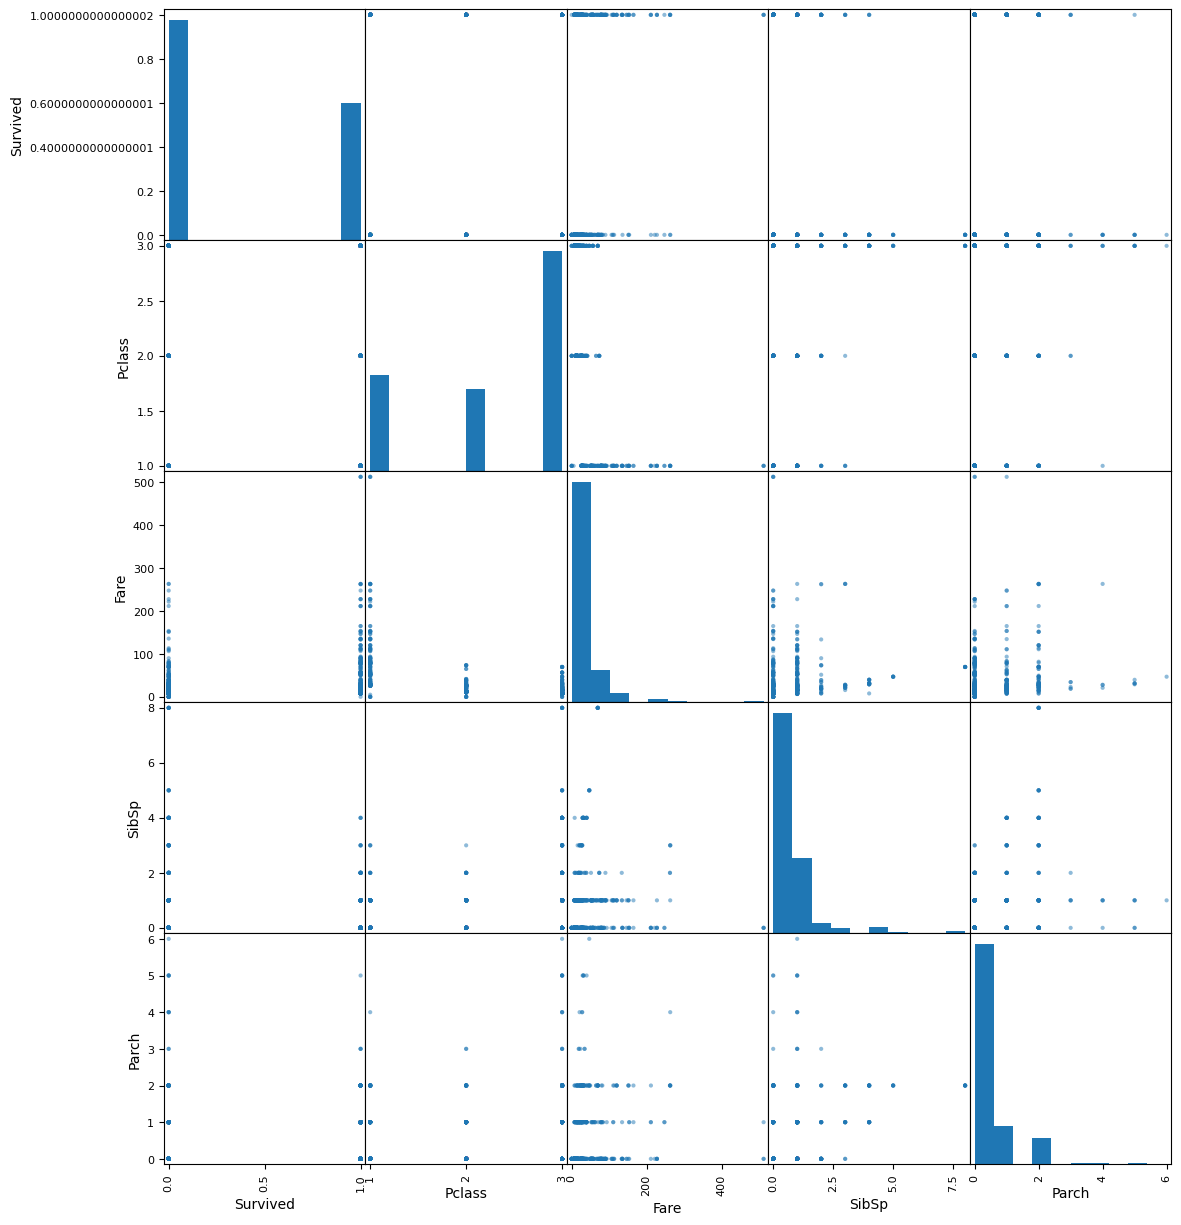

In [92]:
# c.2 Use pandas scatter matrix to plot the relationships between the number of survived
df_scatter = df[['Survived','Pclass','Sex','Fare','SibSp','Parch']]
pd.plotting.scatter_matrix(df_scatter, figsize=(13,15))
plt.show()

# Data preprocessing

In [93]:

# d.1 Drop the three columns you identified in point (b.4) above.
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)


"""
1. Drop the three columns you identified in point (b.4) above.
2. Using “Get dummies” transform all the categorical variables in your dataframe into numeric values.
3. Attach the newly created variables to your dataframe and drop the original columns.
"""

'\n1. Drop the three columns you identified in point (b.4) above.\n2. Using “Get dummies” transform all the categorical variables in your dataframe into numeric values.\n3. Attach the newly created variables to your dataframe and drop the original columns.\n'

In [94]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [95]:
category_vars=['Sex','Embarked']
for var in category_vars:
    cat_list='var'+'_'+var
    print(cat_list)
    cat_list = pd.get_dummies(df[var], prefix=var)
    df_cat= df.join(cat_list)
    df=df_cat


var_Sex
var_Embarked


In [96]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [97]:
# d.4 Remove the original categorical variables columns   
df.drop(['Sex','Embarked'], inplace=True, axis=1)


In [98]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [99]:
# d.5 Replace the missing values in the Age with the mean of the age. 
df['Age'].fillna(df['Age'].median(), inplace=True)


In [100]:
# d.6 Change all column types into float.
df = df.astype('float')

In [101]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0


In [105]:
# d.8 Write a function that accepts a dataframe as an argument & normalizes all the data points in the dataframe.
def normaliseData(df1):
    return df1.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))


In [107]:
# d.9 Call the new function and pass as an argument your transformed dataframe
df_normalised = normaliseData(df)

In [108]:
# d.10 Display (print) the first two records.
df_normalised.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0


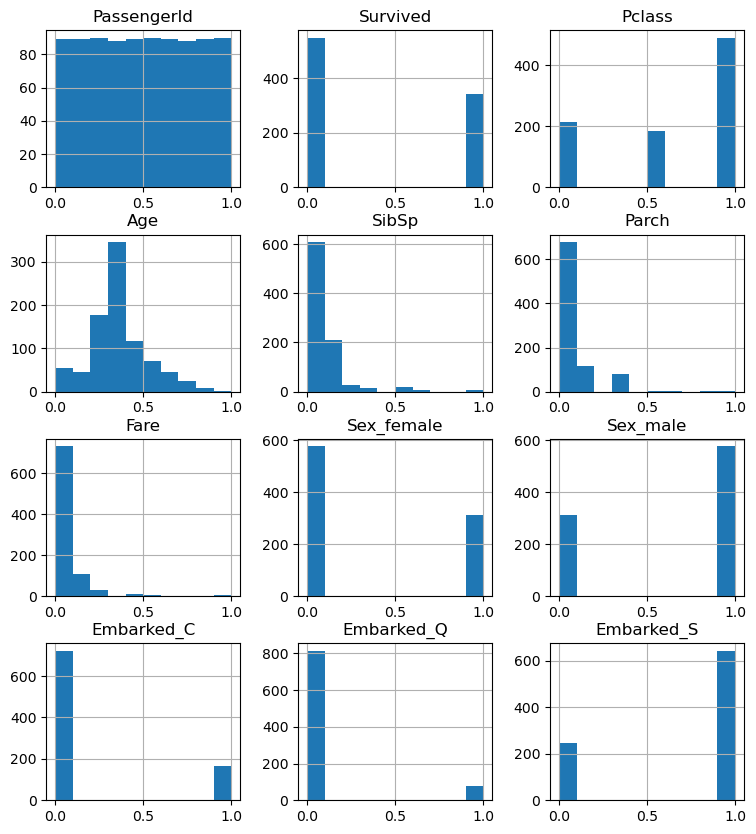

In [109]:
# d.11 Set the figure size to 9 inches by 10 inches for Histogram.
df_normalised.hist(figsize=(9,10))
plt.show()
#d.12. Form the histogram generated focus on the “Port of Embarkation”

# Model Training

In [110]:
#   d.13. Split the features into a dataframe named x_firstname 
#         and the target class into another dataframe named y_firstname.
cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_female', 'Sex_male',
    'Embarked_C', 'Embarked_Q', 'Embarked_S'] 
X=df_normalised[cols]
Y=df_normalised['Survived']

#  i. Using Sklearn “train_test_split” split your data into 70% for training and 30% for testing, 
#     set the random seed to be the last two digits of your student ID number. 
#     Store the training data in a dataframe named: x_train_firstname for the features (predictors) 
#     and the training labels y_train_firstname. Store the test data as follows: x_test_firstname and y_test_firstname.
# """

In [111]:
random.seed(19)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)


In [112]:

# e.1 Using sklearn fit a logistic regression model to the training data.
model = linear_model.LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)


LogisticRegression()

In [113]:

# e.2 Display (print) the coefficients (i.e. the weights of the model).
print(pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_))))


            0                       1
0      Pclass    [-1.864763212293796]
1         Age   [-1.9153618732856583]
2       SibSp   [-1.5015243749479437]
3       Parch   [-0.4677725429792171]
4        Fare   [0.27597779011383655]
5  Sex_female    [1.2816826763348617]
6    Sex_male   [-1.2813779032246893]
7  Embarked_C   [0.12876622490040618]
8  Embarked_Q  [0.041940699174745695]
9  Embarked_S  [-0.37587028378690646]


In [114]:
# prediction
predicted = model.predict(x_test)
print (predicted)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1.]


In [115]:
# accuracy
print (metric.accuracy_score(y_test, predicted))


0.7985074626865671


In [116]:
# LGFGS
scores = cross_val_score(linear_model.LogisticRegression(solver='lbfgs'), x_train, y_train, scoring='accuracy', cv=10)
print(scores)

[0.74603175 0.80952381 0.79365079 0.79032258 0.77419355 0.79032258
 0.79032258 0.83870968 0.82258065 0.82258065]


### printing values for different test size

In [117]:
for i in np.arange (0.10, 0.5, 0.05):
#     test_size = 0.10
#     test_size = 0.15
#     test_size = 0.20 (best--> 83%)
#     test_size = 0.25
#     test_size = 0.30
#     test_size = 0.35
#     test_size = 0.40
#     test_size = 0.45
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    scores = cross_val_score(linear_model.LogisticRegression(solver='lbfgs'), x_train, y_train, scoring='accuracy', cv=10)
    
    print ('Score:', scores)
    print ('Minimum', scores.min())
    print ('Median', scores.mean())
    print ('Maximum', scores.max())
    print('Accuracy :', model.score(x_test, y_test))
    print('\n\n')



Score: [0.81481481 0.7375     0.8125     0.7375     0.8125     0.875
 0.775      0.775      0.8375     0.8       ]
Minimum 0.7375
Median 0.7977314814814814
Maximum 0.875
Accuracy : 0.8



Score: [0.84210526 0.78947368 0.80263158 0.78947368 0.77631579 0.72368421
 0.81578947 0.84       0.82666667 0.8       ]
Minimum 0.7236842105263158
Median 0.8006140350877194
Maximum 0.8421052631578947
Accuracy : 0.8134328358208955



Score: [0.83333333 0.75       0.78873239 0.76056338 0.81690141 0.71830986
 0.78873239 0.83098592 0.83098592 0.77464789]
Minimum 0.7183098591549296
Median 0.7893192488262912
Maximum 0.8333333333333334
Accuracy : 0.8324022346368715



Score: [0.79104478 0.82089552 0.76119403 0.74626866 0.82089552 0.7761194
 0.79104478 0.88059701 0.72727273 0.81818182]
Minimum 0.7272727272727273
Median 0.7933514246947083
Maximum 0.8805970149253731
Accuracy : 0.8071748878923767



Score: [0.87301587 0.82539683 0.82539683 0.77419355 0.85483871 0.80645161
 0.80645161 0.70967742 0.72580645 0.7903

In [118]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

y_pred = model.predict_proba(x_test)
type(y_pred)


numpy.ndarray

In [119]:
# threshold set to 0.5 which is 50%
y_pred_flag=y_pred[:,1]>0.3
y_pred_df=pd.DataFrame(y_pred_flag)

In [120]:
# accuracy 
print(metric.accuracy_score(y_test, y_pred_df))

0.7723880597014925


In [121]:
# threshold set to 0.3 which is 30%
y_pred_flag=y_pred[:,1]>0.3
y_pred_df=pd.DataFrame(y_pred_flag)

In [122]:
# accuracy 
print(metric.accuracy_score(y_test, y_pred_df))

0.7723880597014925


In [123]:
# print the classification report
print(metric.classification_report(y_test, y_pred_df))

              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       168
         1.0       0.65      0.84      0.73       100

    accuracy                           0.77       268
   macro avg       0.77      0.79      0.77       268
weighted avg       0.80      0.77      0.78       268



In [124]:
# confusion matrix
confusionmatrix =confusion_matrix(y_test, y_pred_df)
print (confusionmatrix)

[[123  45]
 [ 16  84]]


In [125]:
# threshold set to 0.70 which is 70%
y_pred_flag=y_pred[:,1]>0.70
y_pred_df=pd.DataFrame(y_pred_flag)

In [126]:
# accuracy
print(metric.accuracy_score(y_test, y_pred_df))

0.8059701492537313


In [128]:
# classification report
print(metric.classification_report(y_test, y_pred_df))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       168
         1.0       0.90      0.54      0.68       100

    accuracy                           0.81       268
   macro avg       0.84      0.75      0.77       268
weighted avg       0.82      0.81      0.79       268



In [129]:
# confusion matrix 
confusionmatrix =confusion_matrix(y_test, y_pred_df)
print (confusionmatrix)

[[162   6]
 [ 46  54]]
